In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.feature import greycomatrix, greycoprops
from skimage import io
import skimage

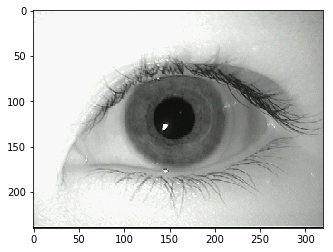

In [2]:
fp1 = io.imread("dbIR/aeval1.bmp")
plt.imshow(fp1, cmap=plt.cm.gray, interpolation='nearest', vmin=0, vmax=255)
plt.show()

## Foreground features

In [3]:
PATCH_SIZE = 21
fgPatch = []

for line in open("dbIR/iris_foreground.txt"):
    
    if(len(line) != 1):

        if(".bmp" in line):
            irisImage_filePath = "dbIR/" + line[:-1] #dbIR/aeval1.bmp
            imageIris = io.imread(irisImage_filePath, as_gray = True)
            imageIris = skimage.img_as_ubyte(imageIris)
            fg_locations = []            
        
        else:
            locs = line.split()
            
            for elem in locs:
                iLoc = elem                
                iLoc = iLoc.split(",")                
                rLoc = iLoc[0][1:]
                cLoc = iLoc[1][:-1]                
                pair = tuple([int(rLoc), int(cLoc)])
                
                fg_locations.append(pair)
            
            for loc in fg_locations:
                patch = imageIris[loc[0] : loc[0] + PATCH_SIZE,
                               loc[1] : loc[1] + PATCH_SIZE]
                fgPatch.append(patch)
        

/home/ubuntu/miniconda3/envs/vcdl/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [4]:
fg_f1 = []
fg_f2 = []
fg_f3 = []
fg_f4 = []
fg_f5 = []
fg_f6 = []

for patch in fgPatch:
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    fg_f1.append(greycoprops(glcm, 'contrast')[0, 0])
    fg_f2.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    fg_f3.append(greycoprops(glcm, 'homogeneity')[0, 0])
    fg_f4.append(greycoprops(glcm, 'energy')[0, 0])
    fg_f5.append(greycoprops(glcm, 'correlation')[0, 0])
    fg_f6.append(greycoprops(glcm, 'ASM')[0, 0])

In [5]:
import numpy as np

X_fg = np.concatenate([np.array(fg_f1).reshape(-1,1), 
                       np.array(fg_f2).reshape(-1,1), 
                       np.array(fg_f3).reshape(-1,1),
                       np.array(fg_f4).reshape(-1,1),
                       np.array(fg_f5).reshape(-1,1),
                       np.array(fg_f6).reshape(-1,1)], axis = 1)

In [6]:
X_fg.shape

(250, 6)

In [7]:
y_fg = np.array([1 for i in range(len(fg_f1))]).reshape(-1,1)
y_fg = y_fg.astype(dtype=np.int32)

In [8]:
y_fg.shape

(250, 1)

In [9]:
colLabels = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'ASM']

## Background Features

In [10]:
PATCH_SIZE = 21
bgPatch = []

for line in open("dbIR/iris_background.txt"):
    
    if(len(line) != 1):

        if(".bmp" in line):
            irisImage_filePath = "dbIR/" + line[:-1]
            imageIris = io.imread(irisImage_filePath, as_gray = True)
            imageIris = skimage.img_as_ubyte(imageIris)
            bg_locations = []           
        
        else:
            locs = line.split()
            
            for elem in locs:
                iLoc = elem                
                iLoc = iLoc.split(",")                
                rLoc = iLoc[0][1:]
                cLoc = iLoc[1][:-1]                
                pair = tuple([int(rLoc), int(cLoc)])
                bg_locations.append(pair)
            
            for loc in bg_locations:
                patch = imageIris[loc[0] : loc[0] + PATCH_SIZE,
                               loc[1] : loc[1] + PATCH_SIZE]                
                bgPatch.append(patch)
        

In [11]:
bg_f1 = []
bg_f2 = []
bg_f3 = []
bg_f4 = []
bg_f5 = []
bg_f6 = []

for patch in bgPatch:
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    bg_f1.append(greycoprops(glcm, 'contrast')[0, 0])
    bg_f2.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    bg_f3.append(greycoprops(glcm, 'homogeneity')[0, 0])
    bg_f4.append(greycoprops(glcm, 'energy')[0, 0])
    bg_f5.append(greycoprops(glcm, 'correlation')[0, 0])
    bg_f6.append(greycoprops(glcm, 'ASM')[0, 0])

In [12]:
X_bg = np.concatenate([np.array(bg_f1).reshape(-1,1), 
                       np.array(bg_f2).reshape(-1,1), 
                       np.array(bg_f3).reshape(-1,1),
                       np.array(bg_f4).reshape(-1,1),
                       np.array(bg_f5).reshape(-1,1),
                       np.array(bg_f6).reshape(-1,1)], axis = 1)

In [13]:
y_bg = np.array([0 for i in range(len(bg_f1))]).reshape(-1,1)
y_bg = y_bg.astype(dtype=np.int32)

In [14]:
X = np.concatenate([X_fg, X_bg])
X.shape

(500, 6)

In [15]:
y = np.concatenate([y_fg, y_bg])

In [16]:
y.shape

(500, 1)

In [17]:
import pandas as pd

irisData = pd.DataFrame(data=X, columns=colLabels)

In [18]:
irisLabel = pd.Series(data=y.ravel())

In [19]:
irisData['label'] = irisLabel

In [20]:
irisData.to_csv("iris.csv", index=False)